In [1]:
# 데이터 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# Numpy를 Image로 변환하기

In [2]:
# Numpy Data 불러오기
import numpy as np

In [3]:
fruits = np.load('../data/fruits.npy')
fruits.shape

(300, 100, 100)

In [4]:
# Image로 저장하기
from PIL import Image

In [19]:
for i in range(0,300):
    image = Image.fromarray(fruits[i]).convert('L')
    image.save('../data/fruits/fruit_%03d.jpg'%i, 'JPEG')

---
### Image를 읽어서 Numpy로 변환하기

In [15]:
import glob

In [16]:
numberOfData = 300
imgSize = 100

In [17]:
# 배열 초기화로 만들기
fruitsData = np.zeros(numberOfData * imgSize * imgSize, dtype=np.int32).reshape(numberOfData, imgSize, imgSize)

In [20]:
# 배열 fruitsData에 저장하기
i = 0
for file in sorted(glob.glob('../data/fruits/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    fruitsData[i, :, :] = img
    i += 1

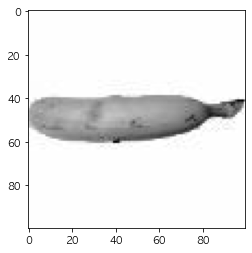

In [24]:
# Image 확인
plt.imshow(fruitsData[200].reshape(100, 100), cmap='gray_r')
plt.show()

In [25]:
# Numpy Image Data를 File로 저장하기
np.save('../data/fruitsData', fruitsData)

> fruitsData.npy 형태로 저장됨.